In [1]:
import torch
print(torch.__version__)

2.1.2


In [2]:
def get_device(gpuid='0', useamp=False):
    if torch.cuda.is_available():
        device = torch.device('cuda:'+str(gpuid))  # CUDA GPU 0
    elif torch.backends.mps.is_available():
        device = torch.device("mps")
        useamp = False
    else:
        device = torch.device("cpu")
        useamp = False
    print("Using device:", device)
    return device, useamp

In [3]:
# setting device
device, useamp = get_device(gpuid='0', useamp=False)

Using device: mps


# Pytorch Basic

https://pytorch.org/docs/stable/generated/torch.reshape.html#torch.reshape

In [30]:
a = torch.arange(4.)
torch.reshape(a, (2, 2))
b = torch.tensor([[0, 1], [2, 3]])
torch.reshape(b, (-1,))

tensor([0, 1, 2, 3])

https://pytorch.org/docs/stable/generated/torch.Tensor.view.html#torch.Tensor.view
The returned tensor shares the same data and must have the same number of elements, but may have a different size

In [53]:
x = torch.randn(4, 4)
x.size()

torch.Size([4, 4])

In [54]:
y = x.view(16)
y.size()

torch.Size([16])

In [55]:
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
z.size()

torch.Size([2, 8])

In [56]:
a = torch.randn(1, 2, 3, 4)
a.size()

torch.Size([1, 2, 3, 4])

In [57]:
b = a.transpose(1, 2)  # Swaps 2nd and 3rd dimension
b.size()

torch.Size([1, 3, 2, 4])

In [58]:
c = a.view(1, 3, 2, 4)  # Does not change tensor layout in memory
c.size()

torch.Size([1, 3, 2, 4])

In [59]:
torch.equal(b, c)

False

In [38]:
N, C, H, W = 2, 3, 4, 4
input = torch.rand(N, C, H, W) #torch.ones(N, C, H, W)
input.shape

torch.Size([2, 3, 4, 4])

In [39]:
newa=input.view(N, C, H*W)
newa.shape

torch.Size([2, 3, 16])

In [40]:
newa=newa.reshape((N,C,H,W))

In [41]:
newa.shape

torch.Size([2, 3, 4, 4])

In [42]:
newa=newa.permute(0, 3, 1, 2)
newa.shape

torch.Size([2, 4, 3, 4])

# Pytorch NN

https://pytorch.org/docs/stable/nn.html

In [70]:
import torch.nn as nn

torch.nn.Sigmoid: any number of dimension input and output: https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html#torch.nn.Sigmoid

In [72]:
m = nn.Sigmoid()
input = torch.randn(2)
input

tensor([0.8573, 1.3461])

In [73]:
output = m(input)
output

tensor([0.7021, 0.7935])

In [75]:
m(torch.tensor(100))

tensor(1.)

## Loss Functions

The L1 loss function computes the mean absolute error between each value in the predicted and target tensor. It computes the sum of all the values returned from each absolute difference computation and takes the average of this sum value to obtain the Mean Absolute Error (MAE). 

L1 loss function (Mean Absolute Error Loss)

In [76]:
import torch
import torch.nn as nn
#reduction specifies the method of reduction to apply to output. 
#Possible values are 'mean' (default) where we compute the average of the output, 
#'sum' where the output is summed and 'none' which applies no reduction to output
loss_fn = nn.L1Loss(size_average=None, reduce=None, reduction='mean')
input = torch.randn(4, 5, requires_grad=True)
target = torch.randn(4, 5)
output = loss_fn(input, target)
print(output) #tensor(0.8467, grad_fn=)

tensor(1.0848, grad_fn=<MeanBackward0>)


In [77]:
input = torch.ones(4, 5, requires_grad=True)
target = torch.ones(4, 5)
output = loss_fn(input, target)
print(output) #tensor(0.8467, grad_fn=)

tensor(0., grad_fn=<MeanBackward0>)


In [78]:
output.item()

0.0

Smooth L1 Loss: torch.nn.SmoothL1Loss

The smooth L1 loss function combines the benefits of MSE loss and MAE loss through a heuristic value beta. It uses a squared term if the absolute error falls below one and an absolute term otherwise. It is less sensitive to outliers than the mean square error loss and, in some cases, prevents exploding gradients. 

In mean square error loss, we square the difference, resulting in a number much larger than the original number. These high values result in exploding gradients. It is avoided here for numbers greater than 1; the numbers are not squared.

In [79]:
loss = nn.SmoothL1Loss()
input = torch.randn(4, 5, requires_grad=True)
target = torch.randn(4, 5)
output = loss(input, target)
print(output) #tensor(1.4590, grad_fn=)

tensor(0.5615, grad_fn=<SmoothL1LossBackward0>)


Mean Squared Error Loss(MSE): torch.nn.MSELoss
The Mean Square Error shares similarities with the Mean Absolute Error. It computes the square difference between values in the prediction tensor and that of the target tensor. 
By doing so, relatively significant differences are penalized more, while relatively minor differences are penalized less. MSE is considered less robust at handling outliers and noise than MAE.


In [80]:
loss = nn.MSELoss(size_average=None, reduce=None, reduction='mean')
#L1 loss function parameters explanation applies here.
input = torch.randn(4, 5, requires_grad=True)
target = torch.randn(4, 5)
output = loss(input, target)
print(output) #tensor(1.4590, grad_fn=)

tensor(1.9196, grad_fn=<MseLossBackward0>)


Cross-entropy (torch.nn.CrossEntropyLoss) as a loss function is used to learn the probability distribution of the data. While other loss functions like squared loss penalize wrong predictions, cross-entropy gives a more significant penalty when incorrect predictions are predicted with high confidence. 
https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

CLASStorch.nn.CrossEntropyLoss(weight=None, size_average=None, ignore_index=-100, reduce=None, reduction='mean', label_smoothing=0.0)
* Computes the cross entropy loss between input logits and target, e.g., classification problem with C classes.
* The input is expected to contain the unnormalized logits for each class (which do not need to be positive or sum to 1, in general). input has to be a Tensor of size (C) for unbatched input, (N,C) or (N,C, d1,d2, ...dk) for the K-dimensional case (e.g., computing cross entropy loss per-pixel for 2D images), N: number of batch.
* The target that this criterion expects should contain either:Class indices in the range [0,C). if ignore_index is specified, this loss also accepts this class index (this index may not necessarily be in the class range). If containing class indices, the target shape should be: shape (), (N) or (N, d1,d2,...dk)
* If provided, the optional argument weight should be a 1D Tensor assigning weight to each of the classes. This is particularly useful when you have an unbalanced training set.

In [104]:
loss = nn.CrossEntropyLoss()
N = 4 # batch size
C = 5 # number of classes
input = torch.randn(N, C, requires_grad=True)
target = torch.empty(N, dtype=torch.long).random_(C)

In [105]:
target

tensor([3, 0, 2, 0])

In [106]:
input

tensor([[-1.5533e+00, -4.7476e-01, -2.9940e-01,  8.1798e-01,  1.1555e+00],
        [-9.7313e-01,  1.6986e+00,  1.3530e+00, -1.4529e+00, -7.1118e-01],
        [-5.6206e-01,  2.7850e-01,  1.5597e+00,  7.9538e-01,  8.7601e-01],
        [-2.2747e-01, -2.6835e+00,  2.2858e-03, -1.1927e-02, -1.0142e-01]],
       requires_grad=True)

In [108]:
#Cross Entropy loss function parameters explanation applies here.
output = loss(input, target)
output.backward()
print(output) #tensor(1.6370, grad_fn=)

tensor(1.7156, grad_fn=<NllLossBackward0>)


In [113]:
loss = nn.CrossEntropyLoss(reduction='none')
output = loss(input, target)
print(output)

tensor([1.1303, 3.3186, 0.8620, 1.5516], grad_fn=<NllLossBackward0>)


In [129]:
# 2D loss example (used, for example, with image inputs)
N, Num_C = 5, 4 #Num_C number of classes
loss = nn.CrossEntropyLoss()
# input is of size N x C x height x width
C, H, W = 3, 10, 10 #image size CHW
K = 3
data = torch.randn(N, C, H, W)
conv = nn.Conv2d(C, Num_C, (K, K))
y = conv(data) #N, Num_C, Hout, Wout
y.size()

torch.Size([5, 4, 8, 8])

In [130]:
target = torch.empty(N, 8, 8, dtype=torch.long).random_(0, C)

In [131]:
output = loss(y, target)
output.backward()
print(output)

tensor(1.5230, grad_fn=<NllLoss2DBackward0>)


In [133]:
loss = nn.CrossEntropyLoss(reduction='none')
output = loss(y, target)
print(output.shape)#classify every pixel

torch.Size([5, 8, 8])


Negative Log-Likelihood Loss: torch.nn.NLLLoss: https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html#torch.nn.NLLLoss

It maximizes the overall probability of the data. It penalizes the model when it predicts the correct class with smaller probabilities and incentivizes when the prediction is made with a higher probability. The logarithm does the penalizing part here. 

The smaller the probabilities, the higher its logarithm will be. The negative sign is used here because the probabilities lie in the range [0, 1], and the logarithms of values in this range are negative. So it makes the loss value to be positive.

In [114]:
m = nn.LogSoftmax(dim=1)
loss = nn.NLLLoss()
# input is of size N x C = 3 x 5
N, C = 3, 5
input = torch.randn(N, C, requires_grad=True)
y = m(input)
y.size()

torch.Size([3, 5])

In [115]:
y

tensor([[-0.8152, -1.3184, -2.2182, -2.1320, -2.7728],
        [-2.5323, -0.9703, -1.8806, -2.5715, -1.1628],
        [-3.0459, -0.9612, -0.8579, -2.3864, -2.9189]],
       grad_fn=<LogSoftmaxBackward0>)

In [116]:
# each element in target has to have 0 <= value < C
target = torch.tensor([1, 0, 4]) #N=3
target.size()

torch.Size([3])

In [117]:
output = loss(y, target) #input (N,C), target: (N), C classes
output.backward()
print(output)

tensor(2.2565, grad_fn=<NllLossBackward0>)


In [83]:
output

tensor(2.3689, grad_fn=<NllLossBackward0>)

In [121]:
# 2D loss example (used, for example, with image inputs)
N, Num_C = 5, 4 #Num_C number of classes
loss = nn.NLLLoss()
# input is of size N x C x height x width
C, H, W = 3, 10, 10 #image size CHW
K = 3
data = torch.randn(N, C, H, W)
conv = nn.Conv2d(C, Num_C, (K, K))
m = nn.LogSoftmax(dim=1)
y = m(conv(data)) #N, Num_C, Hout, Wout
y.size()

torch.Size([5, 4, 8, 8])

In [124]:
import math
S =1 #stride
Hout = math.floor((H-K)/S) +1
Hout

8

In [125]:
Wout = math.floor((H-K)/S) + 1
Wout

8

In [126]:
# each element in target has to have 0 <= value < C
target = torch.empty(N, Hout, Wout, dtype=torch.long).random_(0, C)

In [127]:
target.shape

torch.Size([5, 8, 8])

In [128]:
output = loss(y, target) #Input (N,C), output (N) 4 is number of classes
print(output)

tensor(1.5230, grad_fn=<NllLoss2DBackward0>)


Binary Cross-Entropy loss: https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html#torch.nn.BCELoss

(torch.nn.BCELoss) is a particular class of Cross-Entropy losses used for the unique problem of classifying data points into only two classes. Labels for this type of problem are usually binary, and our goal is to push the model to predict a number close to zero for a zero label and a number close to one for one label.
Usually, when using BCE loss for binary classification problems, the neural network's output is a Sigmoid layer to ensure that the output is either a value close to zero or a value close to one.


In [141]:
m = nn.Sigmoid()
loss = nn.BCELoss()
input = torch.randn(3, requires_grad=True)
target = torch.empty(3).random_(2)
y = m(input)
y.size()

torch.Size([3])

In [142]:
target

tensor([0., 1., 1.])

In [98]:
output = loss(y, target)
print(output)

tensor(1.0469, grad_fn=<BinaryCrossEntropyBackward0>)


In [135]:
N, C = 5, 4 
data = torch.randn(N, C)
m = nn.Sigmoid()
y = m(data) #N, C
y.size()

torch.Size([5, 4])

In [136]:
loss = nn.BCELoss()

In [139]:
# each element in target has to have 0 <= value < C
target = torch.empty(N, C).random_(0, 2)
target

tensor([[1., 1., 1., 1.],
        [1., 0., 1., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 1.],
        [0., 0., 0., 0.]])

In [140]:
output = loss(y, target)
print(output)

tensor(0.9379)


Binary Cross-Entropy Loss with Logits: torch.nn.BCEWithLogitsLoss: https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html#bcewithlogitsloss

It adds a Sigmoid layer and the BCELoss in one single class. It provides numerical stability for log-sum-exp. It is more numerically stable than a plain Sigmoid followed by a BCELoss.


In [147]:
N, C = 4, 3 # 3 classes, batch size = 4
target = torch.ones([N, C], dtype=torch.float32)  
output = torch.full([N, C], 1.5)  # A prediction (logit)
pos_weight = torch.ones([C])  # All weights are equal to 1

In [148]:
target

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [149]:
output

tensor([[1.5000, 1.5000, 1.5000],
        [1.5000, 1.5000, 1.5000],
        [1.5000, 1.5000, 1.5000],
        [1.5000, 1.5000, 1.5000]])

In [150]:
criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
loss = criterion(output, target)  # -log(sigmoid(1.5))
print(loss) #tensor(0.2014)

tensor(0.2014)


pos_weight (Tensor, optional) – a weight of positive examples to be broadcasted with target. Must be a tensor with equal size along the class dimension to the number of classes.

In [101]:
loss = nn.BCEWithLogitsLoss()
input = torch.randn(3, requires_grad=True)
target = torch.empty(3).random_(2)
output = loss(input, target)
output.backward()

In [103]:
output

tensor(0.2814, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html#flatten
torch.nn.Flatten(start_dim=1, end_dim=-1)

In [62]:
input = torch.randn(32, 1, 5, 5)
# With default parameters
m = nn.Flatten()
output = m(input)
output.size()

torch.Size([32, 25])

In [66]:
input = torch.randn(32, 1, 5, 5)
# With default parameters
m = nn.Flatten(1,2)
output = m(input)
output.size()

torch.Size([32, 5, 5])

In [63]:
# With non-default parameters
m = nn.Flatten(0, 2)
output = m(input)
output.size()

torch.Size([160, 5])

https://pytorch.org/docs/stable/generated/torch.nn.Unflatten.html
torch.nn.Unflatten(dim, unflattened_size)

In [67]:
input = torch.randn(2, 50)
# With tuple of ints
m = nn.Sequential(
    nn.Linear(50, 50),
    nn.Unflatten(1, (2, 5, 5))
)
output = m(input)
output.size()

torch.Size([2, 2, 5, 5])

In [68]:
# With torch.Size
m = nn.Sequential(
    nn.Linear(50, 50),
    nn.Unflatten(1, torch.Size([2, 5, 5]))
)
output = m(input)
output.size()

torch.Size([2, 2, 5, 5])

In [69]:
# With namedshape (tuple of tuples)
input = torch.randn(2, 50, names=('N', 'features'))
unflatten = nn.Unflatten('features', (('C', 2), ('H', 5), ('W', 5)))
output = unflatten(input)
output.size()

/var/folders/ns/y1vh84yx69b02kfct_lnh3yh0000gn/T/ipykernel_45924/3221609062.py:2: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1702400234613/work/c10/core/TensorImpl.h:1903.)
  input = torch.randn(2, 50, names=('N', 'features'))


torch.Size([2, 2, 5, 5])

## Fully Connected

https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)
Input: (*, Hin) ∗ means any number of dimensions including none
Output: (*, Hout)

In [43]:
import torch.nn as nn
m = nn.Linear(20, 30)
input = torch.randn(128, 20)
output = m(input)
print(output.size())

torch.Size([128, 30])


In [64]:
N, C, H, W = 2, 3, 4, 4
input = torch.rand(N, C, H, W) #torch.ones(N, C, H, W)
input.shape

torch.Size([2, 3, 4, 4])

In [65]:
m = nn.Linear(4, 8)
output = m(input)
output.shape

torch.Size([2, 3, 4, 8])

## Activation Function

nn.ReLU() creates an nn.Module which you can add e.g. to an nn.Sequential model.
nn.functional.relu on the other side is just the functional API call to the relu function, so that you can add it e.g. in your forward method yourself.

## Normalization

Research Engineer Dr. Yuxin Wu and Research Scientist Dr. Kaiming He proposed a new Group Normalization (GN) technique they say can accelerate deep neural network training with small batch sizes.

Batch Normalization (BN), which has been widely adopted in the development of deep learning. Proposed by Google in 2015, BN can not only accelerate a model’s converging speed, but also alleviate problems such as Gradient Dispersion in the deep neural network, making it easier to train models.

Dr. Wu and Dr. He however argue in their paper Group Normalization that normalizing with batch size has limitations, as BN cannot ensure the model accuracy rate when the batch size becomes smaller. As a result, researchers today are normalizing with large batches, which is very memory intensive, and are avoiding using limited memory to explore higher-capacity models. GN divides channels — also referred to as feature maps that look like 3D chunks of data — into groups and normalizes the features within each group. GN only exploits the layer dimensions, and its computation is independent of batch sizes.

Layer Normalization (LN), proposed in 2016 by a University of Toronto team led by Dr. Geoffrey Hinton; and Instance Normalization (IN), proposed by Russian and UK researchers, are also alternatives for normalizing batch dimensions. While LN and IN are effective for training sequential models such as RNN/LSTM or generative models such as GANs, GN appears to present a better result in visual recognition.

we will visualize the 4D activation maps x by merging the spatial dimensions. Now we have a 3D shape that looks like this:

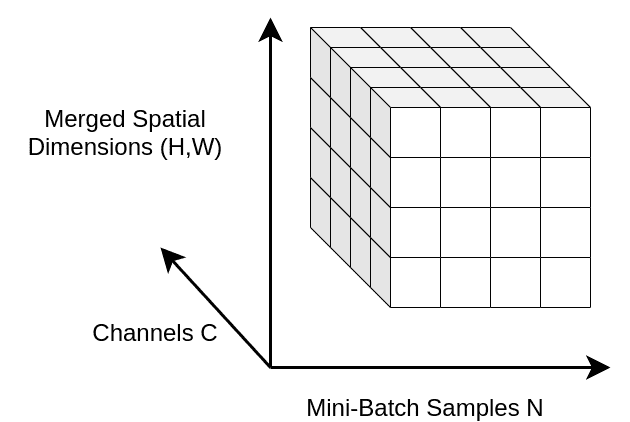

N will be the batch size, while H refers to the height, W to the width, and C to the feature channels. The greek letter μ() refers to mean and the greek letter σ() refers to standard deviation. The batch features are x with a shape of [N, C, H, W].

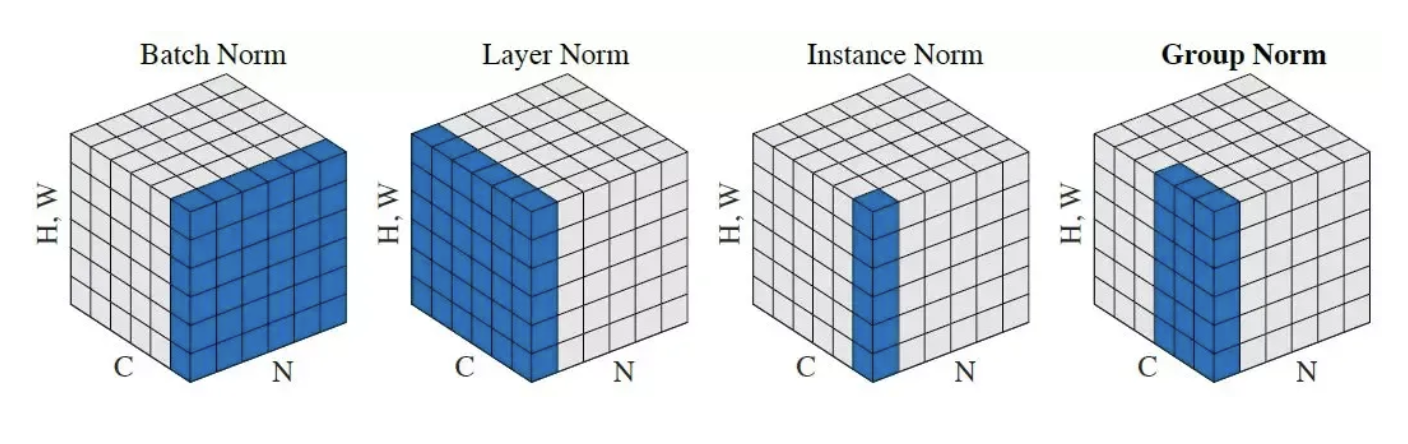

https://pytorch.org/docs/stable/generated/torch.nn.LayerNorm.html
Layer Normalization applies per-element scale and bias with elementwise_affine.
Input: 
(N,∗)

Output: 
(N,∗) (same shape as input)

given a sample of shape [N,C,H,W][N, C, H, W]
[N,C,H,W]
 LayerNorm calculates a mean and variance of all the elements of shape [C,H,W][C, H, W]
[C,H,W]
 in each batch (see the figure below). This method not only solves both problems mentioned above, but also removes the requirement for storing mean and variances for inference (something which Batch Normalization layers needs to do during training).

In [44]:
import torch.nn as nn

In [45]:
# Image Example
N, C, H, W = 2, 3, 4, 4
input = torch.rand(N, C, H, W) #torch.ones(N, C, H, W)
# Normalize over the last three dimensions (i.e. the channel and spatial dimensions)
layer_norm = nn.LayerNorm([C, H, W])

In [46]:
layer_norm

LayerNorm((3, 4, 4), eps=1e-05, elementwise_affine=True)

In [47]:
output = layer_norm(input)
output.shape

torch.Size([2, 3, 4, 4])

In [48]:
N, C = 6, 5
input = torch.rand(N, C)
layer_norm = nn.LayerNorm(5, elementwise_affine=True)

In [49]:
output = layer_norm(input)
output.shape

torch.Size([6, 5])

https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html#torch.nn.BatchNorm2d
torch.nn.BatchNorm2d(num_features

Input: 
(N,C,H,W)

Output: 
(N,C,H,W) (same shape as input)

In [50]:
# With Learnable Parameters
m = nn.BatchNorm2d(100)
# Without Learnable Parameters
m = nn.BatchNorm2d(100, affine=False)
input = torch.randn(20, 100, 45, 45)
output = m(input)

In [51]:
output.shape

torch.Size([20, 100, 45, 45])